<h2 style="background-color:salmon;border-radius:5px;text-align:center;padding:15px;color:white;">AI Technology Assignment - Part 2</h2>
<h4>Done by: TEY JIA YING (2027074D)<br><br>Module Code: IT3312</h4>

<h2 style="background-color:lightpink;border-radius:5px;text-align:center;padding:7px;color:white;">Overview of Part 2</h2>

<h3>Overview:</h3>
I have structured the project into 5 key sections. Below, I will share with you the steps I took together with insights for each section.

1. [Data Understanding](#1)
<br><br>
2. [Data Preparation](#2)<br>
    2.1 [Split Input features and Label](#21)<br>
    2.2 [Data Balancing](#22)<br>
    2.3 [Data Normalization](#23)<br>
    2.4 [One Hot Encoding](#24)<br>
 <br>   
3. [Modelling,Evaluation and Prediction](#7)<br>
    - [Logistic Regression - One-Vs-Rest Classifier](#13)<br>
    - [Random Forest Classifier](#12)<br>
<br>
4. [Comparison of models](#4)
<br><br>
5. [Conclusion](#5)

**<b>Note: Click on the links to go to the respective section</b>**

<a id='1'><h2 style="background-color:lightpink;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">1. Data Understanding</h2>

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from six.moves import cPickle 
import tensorflow as tf
from keras.datasets import cifar10
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
test_batch1=pd.read_pickle("IT3312/test_batch1.pkl")

train_batch1=pd.read_pickle("IT3312/train_batch1.pkl")
train_batch2=pd.read_pickle("IT3312/train_batch2.pkl")
train_batch3=pd.read_pickle("IT3312/train_batch3.pkl")
train_batch4=pd.read_pickle("IT3312/train_batch4.pkl")
train_batch5=pd.read_pickle("IT3312/train_batch5.pkl")

<a id='2'><h2 style="background-color:lightpink;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">2. Data Preparation/EDA</h2>

<a id='21'><h3>2.1 Split Input Features and Label</h3></a>

In [3]:
train_data=pd.concat([train_batch1,train_batch2,train_batch3,train_batch4,train_batch5])

In [4]:
test_data=test_batch1

In [5]:
X_train=train_data.iloc[:,:-1]
y_train=train_data['label']

X_test=test_data.iloc[:,:-1]
y_test=test_data['label']

In [6]:
data=pd.concat([train_data,test_data])
data

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,61,45,48,57,78,96,113,117,123,126,...,96,103,94,72,83,145,189,124,99,6
1,171,134,103,101,130,164,187,195,152,116,...,46,66,91,115,130,134,137,138,137,9
2,255,253,253,253,253,253,253,253,253,253,...,79,76,65,62,68,76,83,83,84,9
3,24,33,34,37,39,36,37,22,26,31,...,65,81,67,75,75,58,47,56,65,4
4,179,177,185,192,194,192,194,193,193,193,...,84,81,78,79,75,74,78,74,76,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,84,84,85,85,84,86,86,86,87,89,...,168,158,205,226,230,221,216,213,213,8
9996,63,74,81,86,90,95,93,98,102,110,...,146,150,155,156,158,179,143,166,164,3
9997,16,15,14,14,13,12,11,10,9,8,...,118,59,28,29,28,27,26,27,25,5
9998,32,26,33,23,24,48,71,87,110,133,...,121,120,121,114,112,110,110,110,107,1


In [7]:
X=data.iloc[:,:-1]
y=data['label']


<a id='22'><h3>2.2 Data Balancing - Understanding distribution of classes</h3></a>

Now let's understand the distribution of classes across X_train, y_train, X_test, y_test to see whether the number of images for each classes are balanced

In [8]:
y_train.value_counts()

6    5000
9    5000
4    5000
1    5000
2    5000
7    5000
8    5000
3    5000
5    5000
0    5000
Name: label, dtype: int64

In [9]:
y_test.value_counts()

3    1000
8    1000
0    1000
6    1000
1    1000
9    1000
5    1000
7    1000
4    1000
2    1000
Name: label, dtype: int64

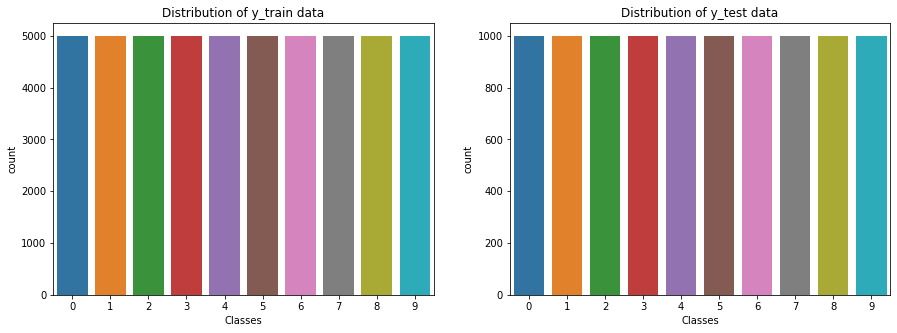

In [10]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of y_train data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of y_test data')
axs[1].set_xlabel('Classes')
plt.show()

As we can see, each classe contain exacly 6000 examples( 5000 for training and 1000 for test).

The graph above is very important for the training, for example if we had just 1000 samples of label 1 that will be a problem , the model will find difficulties to detect label 1"less accuracy ", so that's not going to happend everything look fine. It's important to know the distribution of dataset behind different classes because the goodness of our model depend on it.

Now let's doing some preprocessing.

The output variable have 10 posible values. This is a multiclass classification problem. We need to encode these lables to one hot vectors (ex : "bird" -> [0,0,1,0,0,0,0,0,0,0])

<a id='23'><h3>2.3 Data Normalization - X_train, X_test</h3></a>

In [11]:
X_train=X_train/255
X_test=X_test/255
X=X/255

In [12]:
X_train.shape,X_test.shape

((50000, 1024), (10000, 1024))

<a id='24'><h3>2.4 One Hot Encoding - y_train, y_test</h3></a>

Convert class vectors to binary class matrices. This is called one hot encoding.

In [13]:
y_train

0       6
1       9
2       9
3       4
4       1
       ..
9995    2
9996    6
9997    9
9998    1
9999    1
Name: label, Length: 50000, dtype: uint8

In [14]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)
y=le.fit_transform(y)

In [15]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=int64)

In [16]:
y_train.shape, y_test.shape, y.shape

((50000,), (10000,), (60000,))

<a id='7'><h2 style="background-color:lightpink;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">3. Modelling, Evaluation and Prediction</h2>

Now, we will be doing modelling, evaluation and prediction. There are many types of classification model:<br>
In this project we will be focusing on Logistic Regression - OneVsRest Classifier and Random Forest Classifier.

<b>How will I be going through this process?</b>
1. Try out each model
2. Using grid search CV to Fine tune parameters to give the BEST results for each model
3. Compare the best results of each model(produce a table)
4. Derive the model that gives the BEST results out of all models

<b>Metrics:</b><br>
<b>Why I use cross validation?</b><br>
I will be using cross validation rather than classfication report of precision, recall, f1-score and accuracy, as it allows a better representation assesment of the model performance as it test each and every portion of the dataset for each model. This is because our dataset.  Also, given that the dataset is small, it is better to get a good representative of each portion of our dataset to get a good and reliable test result.

<b>What area of metric will I be focusing on?</b><br>
However, I will be <b>focusing more on f1-score</b> in this project. This is becuase we are not targeting on health related classification or prediction where recall/false negatives are important. Also, our classes are more balanced and we will not need recall to find out the false negatives in each classes. Precision is also not our focus as we are not interested in finding out how well we can predict positive classes. Hence, the most appropriate metrics to be used is the f1-score as it takes into account of both precisionn and recall. 

<a id='13'><h3 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;"><font c
color="darkblue">Model: Logistic Regression - One Vs Rest Classifier</h3>

## A: Building Model -  Logistic Regression

In [17]:
# Baseline logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

lr_one_rest=LogisticRegression()
lr_one_rest.fit(X_train, y_train)

LogisticRegression()

## B: Model Evaluation

In [18]:
y_pred=lr_one_rest.predict(X_test)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.34      0.32      1000
           1       0.37      0.38      0.37      1000
           2       0.25      0.22      0.23      1000
           3       0.23      0.15      0.18      1000
           4       0.25      0.20      0.22      1000
           5       0.31      0.30      0.31      1000
           6       0.27      0.28      0.28      1000
           7       0.29      0.31      0.30      1000
           8       0.33      0.40      0.36      1000
           9       0.38      0.45      0.41      1000

    accuracy                           0.30     10000
   macro avg       0.30      0.30      0.30     10000
weighted avg       0.30      0.30      0.30     10000



In [20]:
#Enter your codes to use cross_validation here
from sklearn.model_selection import cross_validate

result = cross_validate(lr_one_rest, X, y, cv=14, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])
print("Average Accuracy:", np.mean(result['test_accuracy']))
print("Average Precision:", np.mean(result['test_precision_macro']))
print("Average Recall:", np.mean(result['test_recall_macro']))
print("Average F1:", np.mean(result['test_f1_macro']))

Average Accuracy: 0.30255028894612
Average Precision: 0.2966721054891434
Average Recall: 0.30254741364554444
Average F1: 0.29713111131170805


We can see that results for <b>classification report performance is lower than from our cross validation performance</b>. Thus, in the next few models, <b>I will be using cross validation </b>as it allows me to test and train every portion of the dataset. Also, given that the dataset is small, it is better to get a good representative of each portion of our dataset to get a good and reliable test result.

## C: Tuning Parameters

<b>How will I be tuning the parameters?</b><br>
** Hyer-parameter tuning: Use Grid SearchCV to find the best combination of parameters that gives highest precision

In [20]:
params = {
    "solver":['newton-cg', 'lbfgs', 'liblinear'],
    "penalty":['none', 'l1', 'l2', 'elasticnet'],
    "C":[100, 10, 1.0, 0.1, 0.01]
}

In [21]:
# Baseline logistic regression
from sklearn.linear_model import LogisticRegression
lr_one_rest_2 = LogisticRegression()
lr_one_rest_2.fit(X_train, y_train)
grid_search = GridSearchCV(estimator=lr_one_rest_2, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "f1_macro")

In this code, I will be using grid search to run though every parameter and the corresponding values to derive the optimum parameters that will give the highest f1-score

In [22]:
%%time
with tf.device('/GPU:0'):
    grid_search.fit(X_train, y_train)

    score_df = pd.DataFrame(grid_search.cv_results_)
    score_df.head()

Fitting 4 folds for each of 60 candidates, totalling 240 fits
CPU times: total: 7min 11s
Wall time: 15h 7min 32s


In [23]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
54,645.680558,25.694896,0.322569,0.076701,0.01,l2,newton-cg,"{'C': 0.01, 'penalty': 'l2', 'solver': 'newton...",0.301340,0.294059,0.298078,0.296828,0.297576,0.002615,1
55,182.383722,2.585470,0.374333,0.056407,0.01,l2,lbfgs,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.302378,0.293532,0.297482,0.296277,0.297417,0.003202,2
41,361.017519,20.525955,0.276814,0.026796,0.1,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.296358,0.295264,0.291623,0.293390,0.294159,0.001808,3
43,171.807474,5.265923,0.361094,0.098794,0.1,l2,lbfgs,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.296900,0.290820,0.292457,0.294331,0.293627,0.002262,4
1,186.467211,6.064073,3.086947,2.437766,100,none,lbfgs,"{'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}",0.300280,0.289427,0.291642,0.292919,0.293567,0.004072,5


In [24]:
lr_one_rest_best=grid_search.best_estimator_

In [25]:
lr_one_rest_best

LogisticRegression(C=0.01, solver='newton-cg')

In [21]:
lr_one_rest_best=LogisticRegression(C=0.01, solver='newton-cg')

Now, we have derived the grid search best estimator with the corresponding parameters of C=0.1, multi_class='ovr', random_state=42,solver='newton-cg'

In [22]:
#Enter your codes to use cross_validation here
from sklearn.model_selection import cross_validate

result = cross_validate(lr_one_rest_best, X, y, cv=14, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])
print("Average Accuracy:", np.mean(result['test_accuracy']))
print("Average Precision:", np.mean(result['test_precision_macro']))
print("Average Recall:", np.mean(result['test_recall_macro']))
print("Average F1:", np.mean(result['test_f1_macro']))

Average Accuracy: 0.3045335678516025
Average Precision: 0.29792204745026574
Average Recall: 0.3045337839730363
Average F1: 0.298538722827065


## D: Model Insights

<b>After much tuning, let's view the summary of model results:</b>

<table>
    <thead>
        <td>Tuning Methods</td>
        <td>Model information</td>
        <td>Accuracy</td>
        <td>Precision</td>
        <td>Recall</td>
        <td>f1-score</td>
    </thead>
    <tr>
        <td>Original Model (No Parameters)</td>
        <td>LogisticRegression()</td>
        <td>0.303</td>
        <td>0.297</td>
        <td>0.303</td>
        <td>0.297</td>
    </tr>
    <tr>
        <td style="background-color:salmon;color:white;">Grid search CV</td>
        <td style="background-color:salmon;color:white;">LogisticRegression(C=0.01, solver='newton-cg')</td>
        <td style="background-color:salmon;color:white;">0.305</td>
        <td style="background-color:salmon;color:white;">0.298</td>
        <td style="background-color:salmon;color:white;">0.305</td>
        <td style="background-color:salmon;color:white;">0.299</td>
    </tr>
</table>

From this table we can see that we can use the tuned logistic regression model which is <b>LogisticRegression(C=0.01, solver='newton-cg')</b> as it gives the higher precision, accuracy, recall and f1-score

### Conclusion: Highest f1-score of tuned Logistic Regression Classifier is 29.9%

## E: Predictions

Lets do some prediction with class 9

In [23]:
image=data[data['label']==9].iloc[:,:-1].iloc[15].values.reshape(1,1024)

In [24]:
lr_one_rest_best.fit(X_train,y_train)

LogisticRegression(C=0.01, solver='newton-cg')

In [25]:

print("Predicted Class: ",str(lr_one_rest_best.predict(image)))

Predicted Class:  [9]


<a id='12'><h3 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;"><font color="darkblue">Model: Random Forest Classifier</h3>

## A: Building Model -  Random Forest Classifier

In [26]:
RFC=RandomForestClassifier()
RFC.fit(X_train, y_train)

RandomForestClassifier()

## B: Model Evaluation

### Cross Validation

In [ ]:
y_pred=RFC.predict(X_test)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.45      0.46      1000
           1       0.48      0.49      0.48      1000
           2       0.34      0.35      0.34      1000
           3       0.30      0.23      0.26      1000
           4       0.33      0.36      0.34      1000
           5       0.40      0.36      0.37      1000
           6       0.39      0.43      0.41      1000
           7       0.46      0.41      0.43      1000
           8       0.49      0.54      0.52      1000
           9       0.44      0.52      0.48      1000

    accuracy                           0.41     10000
   macro avg       0.41      0.41      0.41     10000
weighted avg       0.41      0.41      0.41     10000



In [ ]:
#Enter your codes to use cross_validation here
from sklearn.model_selection import cross_validate

result = cross_validate(RFC, X, y, cv=14, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])
print("Average Accuracy:", np.mean(result['test_accuracy']))
print("Average Precision:", np.mean(result['test_precision_macro']))
print("Average Recall:", np.mean(result['test_recall_macro']))
print("Average F1:", np.mean(result['test_f1_macro']))

Average Accuracy: 0.41546680240764966
Average Precision: 0.4131701524135128
Average Recall: 0.4154694993480041
Average F1: 0.4125953158951488


## C: Tuning Parameters

<b>How will I be tuning the parameters?</b><br>
** Hyer-parameter tuning: Use Grid SearchCV to find the best combination of parameters that gives highest precision

In [26]:
params={
    'bootstrap': [True, False],
 'max_features': ['sqrt','log2'],
 'n_estimators': [10, 100, 1000]}

In [27]:
rfc_2 = RandomForestClassifier()
rfc_2.fit(X_train, y_train)
grid_search = GridSearchCV(estimator=rfc_2, 
                           param_grid=params, 
                           cv=2, n_jobs=-1, verbose=1, scoring = "f1_macro")


In this code, I will be using grid search to run though every parameter and the corresponding values to derive the optimum parameters that will give the highest f1-score

In [28]:
%%time
with tf.device('/GPU:0'):
    grid_search.fit(X_train, y_train)

    score_df = pd.DataFrame(grid_search.cv_results_)
    score_df.head()

Fitting 2 folds for each of 12 candidates, totalling 24 fits
CPU times: total: 28min 22s
Wall time: 44min 34s


In [ ]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
8,1285.071068,10.590887,25.001089,1.175810,False,sqrt,1000,"{'bootstrap': False, 'max_features': 'sqrt', '...",0.430506,0.416952,0.423729,0.006777,1
7,166.180969,1.085745,3.753347,0.638644,False,sqrt,100,"{'bootstrap': False, 'max_features': 'sqrt', '...",0.404195,0.397403,0.400799,0.003396,2
10,81.954479,15.737047,3.536797,0.013003,False,log2,100,"{'bootstrap': False, 'max_features': 'log2', '...",0.400691,0.389286,0.394988,0.005703,3
1,131.583164,6.333427,8.193347,0.787678,True,sqrt,100,"{'bootstrap': True, 'max_features': 'sqrt', 'n...",0.392287,0.382533,0.387410,0.004877,4
4,49.934261,1.790903,6.667503,3.300745,True,log2,100,"{'bootstrap': True, 'max_features': 'log2', 'n...",0.383171,0.383776,0.383473,0.000302,5


In [ ]:
rfc_best=grid_search.best_estimator_
rfc_best

RandomForestClassifier(bootstrap=False, n_estimators=1000)

In [30]:
rfc_best=RandomForestClassifier(bootstrap=False,n_estimators=1000)

In [30]:
#Enter your codes to use cross_validation here
from sklearn.model_selection import cross_validate

result = cross_validate(rfc_best, X, y, cv=14, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])
print("Average Accuracy:", np.mean(result['test_accuracy']))
print("Average Precision:", np.mean(result['test_precision_macro']))
print("Average Recall:", np.mean(result['test_recall_macro']))
print("Average F1:", np.mean(result['test_f1_macro']))

Average Accuracy: 0.45190020004111736
Average Precision: 0.45019237355092795
Average Recall: 0.45190051381640167
Average F1: 0.44776300560442067


## D: Model Insights

<b>After much tuning, let's view the summary of model results:</b>

<table>
    <thead>
        <td>Tuning Methods</td>
        <td>Model information</td>
        <td>Accuracy</td>
        <td>Precision</td>
        <td>Recall</td>
        <td>f1-score</td>
    </thead>
    <tr>
        <td>Original Model (No Parameters)</td>
        <td>RandomForestClassifier()</td>
        <td>0.415</td>
        <td>0.413</td>
        <td>0.415</td>
        <td>0.413</td>
    </tr>
    <tr>
        <td style="background-color:salmon;color:white;">Grid search CV</td>
        <td style="background-color:salmon;color:white;">RandomForestClassifier(bootstrap=False,n_estimators=1000)</td>
        <td style="background-color:salmon;color:white;">0.451</td>
        <td style="background-color:salmon;color:white;">0.450</td>
        <td style="background-color:salmon;color:white;">0.452</td>
        <td style="background-color:salmon;color:white;">0.448</td>
    </tr>
</table>

### Conclusion: Highest f1-score of tuned Random Forest Classifier is 45%.

## E: Predictions

Let's do some predictions with class 9 images

In [31]:
image=data[data['label']==9].iloc[:,:-1].iloc[15].values.reshape(1,1024)

In [32]:
rfc_best.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, n_estimators=1000)

In [33]:
print("Predicted Class: ",str(lr_one_rest_best.predict(image)))

Predicted Class:  [9]


<a id='4'><h2 style="background-color:lightpink;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">4. Model Comparisons</h2>

<b>Let's compare the summary of all model results:</b>

<table>
    <thead>
        <td>Fine- Tuned model of algorithms</td>
        <td>Model information</td>
        <td>Accuracy</td>
        <td>Precision</td>
        <td>Recall</td>
        <td>f1-score</td>
    </thead>
    <tr>
        <td >Grid search CV</td>
        <td >LogisticRegression(C=0.01, solver='newton-cg')</td>
        <td >0.305</td>
        <td >0.298</td>
        <td >0.305</td>
        <td >0.299</td>
    </tr>
    <tr>
        <td style="background-color:salmon;color:white;">Grid search CV</td>
        <td style="background-color:salmon;color:white;">RandomForestClassifier(bootstrap=False,n_estimators=1000)</td>
        <td style="background-color:salmon;color:white;">0.451</td>
        <td style="background-color:salmon;color:white;">0.450</td>
        <td style="background-color:salmon;color:white;">0.452</td>
        <td style="background-color:salmon;color:white;">0.448</td>
    </tr>
</table>

<b>Conclusion: The best model to be used is tuned RandomForestClassifier(bootstrap=False,n_estimators=1000) with the highest accuracy of 45.1%, precision of 45%, recall 0f 45.2% and f1-score of 45%.</b>

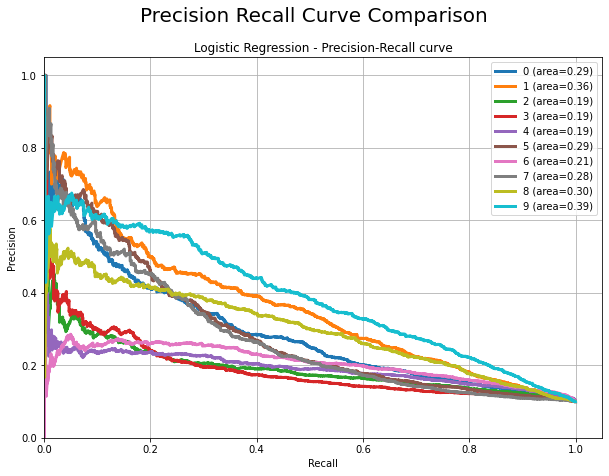

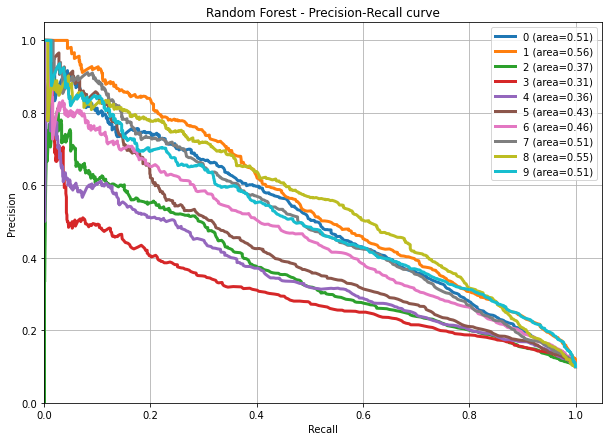

In [43]:
## Plot precision-recall curve
from sklearn.metrics import precision_recall_curve, auc
classes = np.unique(test_data['label'])
predicted_prob = rfc_best.predict_proba(X_test)
y_test_array = pd.get_dummies(test_data['label'], drop_first=False).values

plt.figure(figsize=(10, 7))
plt.suptitle("Precision Recall Curve Comparison",fontsize=20)
for i in range(len(classes)):
    precision, recall, thresholds = precision_recall_curve(
                 y_test_array[:,i], lr_one_rest_best.predict_proba(X_test)[:,i])
    plt.plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  auc(recall, precision))
              )

plt.xlim(0.0,1.05)
plt.ylim(0.0,1.05)
plt.xlabel('Recall')
plt.ylabel("Precision")
plt.title("Logistic Regression - Precision-Recall curve")
plt.legend(loc="best")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
for i in range(len(classes)):
    precision, recall, thresholds = precision_recall_curve(
                 y_test_array[:,i], rfc_best.predict_proba(X_test)[:,i])
    plt.plot(recall, precision, lw=3, label='{0} (area={1:0.2f})'.format(classes[i], auc(recall, precision)))

plt.xlim(0.0,1.05)
plt.ylim(0.0,1.05)
plt.xlabel('Recall')
plt.ylabel("Precision")
plt.title("Random Forest - Precision-Recall curve")
plt.legend(loc="best")
plt.grid(True)
plt.show()

From the precision recall curve as shown, we can see that the random forest as a higher area under the curve ranging from <b>0.31 to 0.56</b> which represents a higher precision and recall achieved where there is a lower false positive rate and lower false negative rate. As for logistic rgeression, it has a relatively <b>lower areas under the curve of 0.19 to 0.39</b>.
<b>Hence the tuned random forest classifier would be a better model than the logistic regression classifier.</b>

In [44]:
from sklearn.metrics import confusion_matrix
labels = ['0:Airplane', '1:Automobile', '2:Bird', '3:Cat', '4:Deer', '5:Dog', '6:Frog', '7:Horse', '8:Ship', '9:Truck']

def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

<Figure size 432x288 with 0 Axes>

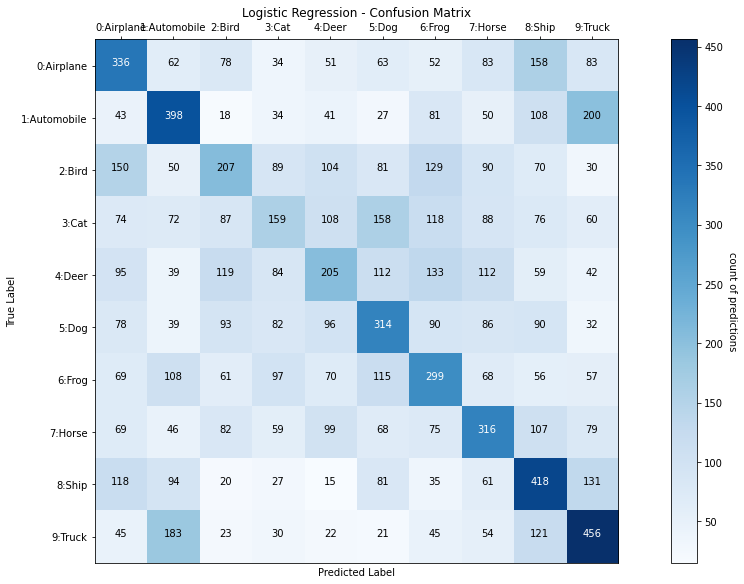

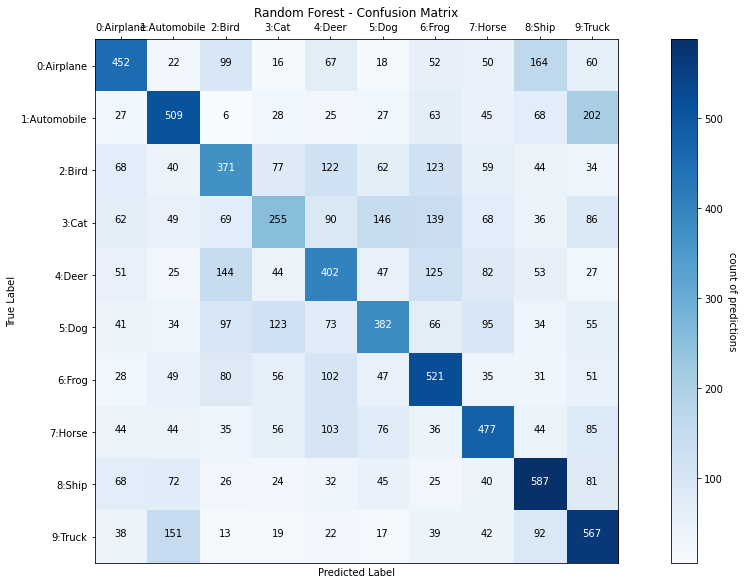

In [48]:
from sklearn.metrics import confusion_matrix
labels = ['0:Airplane', '1:Automobile', '2:Bird', '3:Cat', '4:Deer', '5:Dog', '6:Frog', '7:Horse', '8:Ship', '9:Truck']

cm1 = confusion_matrix(y_test, lr_one_rest_best.predict(X_test)) 
thresh = cm1.max() / 2.

cm2 = confusion_matrix(y_test, rfc_best.predict(X_test)) 
thresh = cm2.max() / 2.


plt.suptitle("Confusion Matrix Comparison",fontsize=20)
fig, ax = plt.subplots(figsize=(15,8))
im, cbar = heatmap(cm1, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm1, threshold=thresh)
fig.tight_layout()
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


fig, ax = plt.subplots(figsize=(15,8))
im, cbar = heatmap(cm2, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm2, threshold=thresh)
fig.tight_layout()
plt.title("Random Forest - Confusion Matrix")
plt.show()


From the confusion matrix, we can see that random forest classifier has a higher number of right predictions than the logisitc regression especially for class 0,1,8,9. For logistic regression, it has a lower performance than the random forest classifier for all classes.

In summary, both models' f1-score are still below 50%. This could be due to the nature of the data and the machine learning models. Hence, in the next section, I will be trying out deep learning in an attempt to increase the model performance.

### Conclusion: Best Model is Tuned Random Forest Classifier - RandomForestClassifier(bootstrap=False,n_estimators=1000) with highest f1-score of 45%
